In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_json('purchase_data.json')

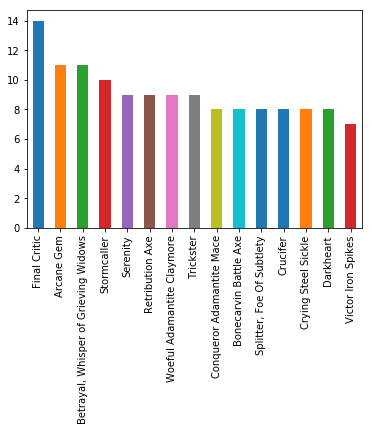

In [6]:
df['Item Name'].value_counts().head(15).plot.bar();

In [13]:
top_items = list(df['Item Name'].value_counts()[:8].to_dict().keys())
#since the value count is the same for the 5th item and the 8th items, I included those in top items. 

In [14]:
top_items

['Final Critic',
 'Arcane Gem',
 'Betrayal, Whisper of Grieving Widows',
 'Stormcaller',
 'Serenity',
 'Retribution Axe',
 'Woeful Adamantite Claymore',
 'Trickster']

In [15]:
mask = df['Item Name'].isin(top_items)

In [16]:
top_items_df = df[mask]

In [17]:
top_items_df.sort_values(['Item Name'])
#TODO should item name be index? how to display top item at the top? 

,Age,Gender,Item ID,Item Name,Price,SN
171,21,Male,84,Arcane Gem,2.23,Stryanastip77
742,26,Male,84,Arcane Gem,2.23,Inguron55
354,20,Male,84,Arcane Gem,2.23,Mindirra92
338,17,Male,84,Arcane Gem,2.23,Lisossanya98
416,25,Male,84,Arcane Gem,2.23,Hiarideu73
711,22,Male,84,Arcane Gem,2.23,Tyananurgue44
297,24,Male,84,Arcane Gem,2.23,Yarolwen77
440,21,Male,84,Arcane Gem,2.23,Stryanastip77
116,25,Male,84,Arcane Gem,2.23,Koikirra25
766,22,Female,84,Arcane Gem,2.23,Nitherian58
